In [1]:
from PIL import Image
import pandas as pd
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow import keras

In [2]:
ourGenre = 'Comedy'

In [4]:
data = pd.read_csv(f"../GenresCSV/{ourGenre}.csv")
data

,Unnamed: 0,imdbID,Genre
0,0,tt0080684,0
1,1,tt0080684,0
2,2,tt0080684,0
3,3,tt0080377,1
4,4,tt0080549,0
...,...,...,...
5113,5113,tt3774466,1
5114,5114,tt1950135,1
5115,5115,tt4358230,1
5116,5116,tt2735292,1


In [5]:
genre = []
poster = []

In [7]:
for i in range(len(data)):
    tempImage = Image.open(f"../Posters100x100/{data['imdbID'][i]}.jpg")
    poster.append(np.array(tempImage))
    genre.append(data['Genre'][i])

In [8]:
print(len(genre))
print(len(poster))
print(len(poster[0]))
print(len(poster[0][0]))
print(len(poster[0][0][0]))

5118
5118
100
100
3


In [9]:
GenreStrings = [f"Not {ourGenre}", f"{ourGenre}"]

In [10]:
for i in range(len(poster) -1, -1 ,-1):
    if poster[i].shape != (100,100,3): 
        #some posters didnt have 100,100,3 so we deleted them
        genre.pop(i)
        poster.pop(i)
        
print(len(genre))

5118


In [13]:
X_train, X_test, y_train, y_test = train_test_split(poster, genre, test_size=0.1)

In [14]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

4606
4606
512
512


In [15]:
X_train = np.array(X_train) #turn them into numpy arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [16]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (4606, 100, 100, 3)
4606 train samples
512 test samples


In [17]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print (y_train.shape)
print(y_test.shape)
print (y_train)
print (y_train[0])

(4606, 2)
(512, 2)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
[1. 0.]


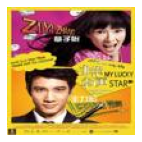

[0. 1.]
Comedy


In [18]:
index = 50
plt.figure(figsize=(20, 4))
# original
plt.subplot(2, 10, 1)
# plt.figure(figsize = (15,2))
plt.imshow(X_train[index].reshape(100, 100,3))
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()
print(y_train[index])
print(GenreStrings[np.argmax(y_train[index])])

In [19]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(len(GenreStrings), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dropout (Dropout)           (None, 20000)             0

In [20]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])

In [21]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
29/29 [==============================] - 44s 1s/step - loss: 0.7051 - accuracy: 0.5698 - val_loss: 0.6414 - val_accuracy: 0.6377
Epoch 2/5
29/29 [==============================] - 42s 1s/step - loss: 0.6254 - accuracy: 0.6545 - val_loss: 0.6103 - val_accuracy: 0.6735
Epoch 3/5
29/29 [==============================] - 42s 1s/step - loss: 0.5782 - accuracy: 0.6949 - val_loss: 0.5669 - val_accuracy: 0.7191
Epoch 4/5
29/29 [==============================] - 42s 1s/step - loss: 0.5311 - accuracy: 0.7383 - val_loss: 0.5720 - val_accuracy: 0.7093
Epoch 5/5
29/29 [==============================] - 42s 1s/step - loss: 0.4903 - accuracy: 0.7674 - val_loss: 0.5044 - val_accuracy: 0.7267


(512, 2)


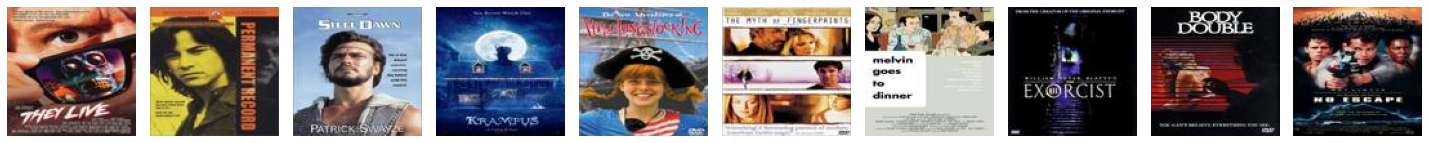

[0.59119016 0.40880984]
0
Genre is Not Comedy Predicted is Not Comedy ([0.59119016 0.40880984])
Genre is Not Comedy Predicted is Not Comedy ([0.6642431  0.33575684])
Genre is Not Comedy Predicted is Comedy ([0.13556503 0.86443496])
Genre is Comedy Predicted is Comedy ([0.42118633 0.5788137 ])
Genre is Not Comedy Predicted is Not Comedy ([0.6282449 0.3717551])
Genre is Comedy Predicted is Comedy ([0.18559034 0.8144096 ])
Genre is Comedy Predicted is Comedy ([0.31699908 0.68300086])
Genre is Not Comedy Predicted is Not Comedy ([0.941874   0.05812595])
Genre is Not Comedy Predicted is Not Comedy ([0.9611614  0.03883859])
Genre is Not Comedy Predicted is Not Comedy ([0.7757557  0.22424428])


In [22]:
# Compare original images with Predicted ones
decoded_imgs1 = model.predict(X_test)
offset = 0
decoded_imgs1= decoded_imgs1[offset:]
print(decoded_imgs1.shape)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    # plt.figure(figsize = (15,2))
    plt.imshow(X_test[i+offset].reshape(100, 100,3))
    plt.gray()
    plt.axis('off')
plt.tight_layout()
plt.show()
print(decoded_imgs1[0])
print(np.argmax(decoded_imgs1[0]))
for i in range(10):
  print(f"Genre is {GenreStrings[np.argmax(y_test[i+offset])]} Predicted is {GenreStrings[np.argmax(decoded_imgs1[i])]} ({decoded_imgs1[i+offset]})")

In [23]:
#Evaluate the trained model
#Should have test and train genres equal
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.2f}%".format(score[0]*100))
print("Test Accuracy:  {:.2f}%".format(score[1]*100))

16/16 [==============================] - 2s 87ms/step - loss: 0.5263 - accuracy: 0.7617
Test Loss: 52.63%
Test Accuracy:  76.17%


In [24]:
checkpoint_path = f"../Weights/{GenreStrings[1]}/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [25]:
model.save_weights(checkpoint_path)

In [26]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'../Weights/Comedy\\cp.ckpt'

In [70]:
# Loads the weights
model.load_weights(checkpoint_path)

In [71]:
# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

12/12 - 1s - loss: 0.7566 - accuracy: 0.7528 - 519ms/epoch - 43ms/step
Restored model, accuracy: 75.28%
